In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
np.random.seed(123)


In [2]:
data = pd.read_csv(r'./maps/FVG/FVG_companies.csv', dtype='str')
data.columns = ['ind', 'cf', 'company','unit', 'lat', 'lon']

data['lat'] = data['lat'].astype(float)
data['lon'] = data['lon'].astype(float)
data.shape
data.columns
data.describe

<bound method NDFrame.describe of                                                     ind           cf  \
0                                                   NaN  00079760328   
1     . AUTOPORTO DOGANALE S.LEOPOLDO 4, 33016, PONT...  00521770321   
2     . MARINA DI AURISINA 153/L, 34011, DUINO AURIS...  00968120329   
3                  . SAN ELISEO 21/C, 33030, MAJANO, UD  00325520302   
4     . TANGENZIALE OVEST VIA VENEZIA 1, 33010, TAVA...  00991520305   
...                                                 ...          ...   
7950  ZONA INDUSTRIALE UDINESE, 33050, PAVIA DI UDIN...  00992960302   
7951  ZONA INDUSTRIALE VIA REMIS 17, 33050, SAN VITO...  02069870307   
7952  ZONA INDUSTRIALE VIA S. MARCO 17, 33099, VIVAR...  00412260937   
7953               ZONA INDUSTRIALE, 33085, MANIAGO, PN  01041280932   
7954             ZONA LISERT S/N, 34074, MONFALCONE, GO  01523580304   

                                               company   unit        lat  \
0                        

In [3]:
def plot_clusters(X, cluster_labels, centroids):
    _, ax = plt.subplots(figsize=(6, 6))
    for i in np.unique(cluster_labels):
        cluster_points = X[cluster_labels == i , :]        
        centroid = centroids[i , :]
        plt.scatter(cluster_points[:,0] , cluster_points[:,1] , cmap = i, marker='.')
        plt.scatter(centroid[0] , centroid[1] , c = 'black', marker='*', s=60)  

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Visualization of clustered data', fontweight='bold')
    ax.set_aspect('equal')
    plt.show

(7955, 2)


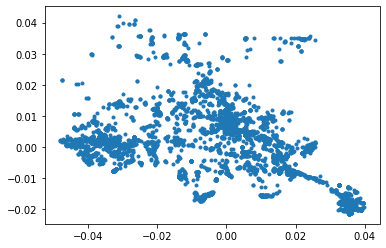

In [4]:
X = np.array(data[ ['lon','lat'  ] ]) 
X = (X - X.mean(axis=0))/X.std()
print(X.shape)
plt.scatter(X[:,0] , X[:,1] ,  marker='.')


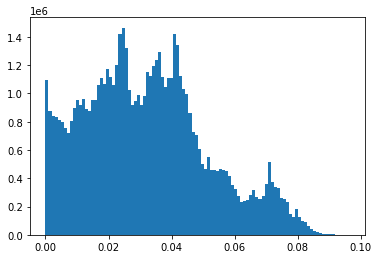

In [5]:
#compute the minimum distances of the k-th nearest neighbour
from scipy.spatial import distance_matrix
dm = distance_matrix(X,X)
values = np.reshape(dm,-1)
plt.hist(values, bins = 100)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

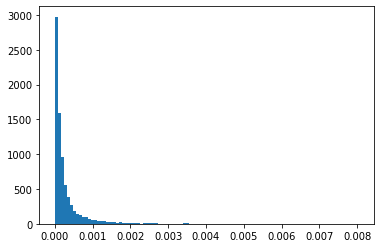

In [6]:
knn = 5
min_distances= np.partition(dm, knn, axis=0)[knn] 
plt.hist(min_distances, bins = 100)
plt.show

In [7]:
for p in range(10,100,10):
    print(f"il {p}° percentile ==> distanza {np.percentile(min_distances, p)}")

il 10° percentile ==> distanza 0.0
il 20° percentile ==> distanza 3.8689049631348505e-05
il 30° percentile ==> distanza 6.132700849849182e-05
il 40° percentile ==> distanza 8.951159880845663e-05
il 50° percentile ==> distanza 0.00012759409635238196
il 60° percentile ==> distanza 0.0001779280182503598
il 70° percentile ==> distanza 0.000246781844279257
il 80° percentile ==> distanza 0.0003740352486409508
il 90° percentile ==> distanza 0.0007036251123530892


In [8]:
# dm = distance_matrix(X,X)
# index = 2
# distances = dm[index]

# epsilon = .02

# distances_epsilon = distances[ distances <= epsilon]



In [9]:
# def epsilon_neighborhood( index, epsilon):
#     distances = dm[index]
#     neighbours_indices = np.where( distances <= epsilon )
#     return np.array(neighbours_indices)[0]

# def is_core(p, epsilon, minPoints):
#     nbhood =  epsilon_neighborhood(p, epsilon)
#     return (len(nbhood) >= minPoints)

# def is_directly_density_reachable(p,q, epsilon, minPoints):
#     '''An object q is directly density-reachable from object p 
#     if q is within the ε-Neighborhood of p 
#     and p is a core object'''
#     is_ddr = False
#     neib=np.array([])
#     if is_core(p, epsilon, minPoints):
#         neib = epsilon_neighborhood(p, epsilon)
#         if (q in neib):
#             is_ddr = True
#     return is_ddr, neib




In [10]:
# for eps in [.11, .002]:
#     nbindexes = epsilon_neighborhood(12, eps)
#     print(nbindexes)
    

In [11]:
# for i in range(70):
#     nbindexes =  epsilon_neighborhood(i, epsilon=.0011)
#     print( len(nbindexes))
    

In [12]:
# epsilon = .0011
# minPoints = 26
# t,f= 0,0
# for p in range(100):
#     for q in range(100):
#         is_ddr, neib = is_directly_density_reachable(p,q, epsilon, minPoints)
#         if is_ddr: 
#             t+=1 
#         else: 
#             f+=1

# print(t,f)

In [13]:
#retrieva all points density reachable from P

# def density_reachable( p, epsilon, minPoints):
#     density_reachable = []
#     for q in list(points):
#         is_ddr, neib = is_directly_density_reachable(p,q, epsilon, minPoints)
#         if is_ddr: 
#             density_reachable.append(neib)
#     return density_reachable



In [18]:

def clustering_density_peaks_halo(X, epsilon, minPoints):
    dm = distance_matrix(X,X)

    n_points = len(X)
    points = np.arange(n_points)
    clusters = np.zeros(n_points)

    cluster_id = 0
    tovisit = np.sum(clusters == 0)
    while(tovisit > 0):
        p = np.random.choice(points[ clusters == 0 ])
        # directly density reachable!
        distances = dm[p]
        nbhood = np.unique(np.where( distances <= epsilon )).flatten()
        lnb = len(nbhood)
        #check indirect reachability  
        # TODO THIS IS JUST THE FIRST LEVEL!! ADD RECURSIVE SEARCH AND APPEND ALL INDIRECT
        # TODO devi esplorare l'intera catena di "reachability"       
        
        
        something_to_add = True
        while (something_to_add): 
            for i in range(lnb): 
                distances = dm[nbhood[i]]
                indirect = np.unique(np.where( distances <= epsilon )).flatten()
                nbhood = np.unique(np.append(nbhood, indirect).flatten())
                
            if (True): something_to_add = False
                
        if (len(nbhood) >= minPoints):# is_core:
            cluster_id += 1
            clusters[p] = int(cluster_id)
            for i in range(len(nbhood)):
                    clusters[nbhood[i]] = int(cluster_id)
        else: #is halo
            clusters[p] = int(-1)

        
        tovisit = np.sum(clusters == 0)
    
    #encode "halo" as 0    
    clusters[ clusters == -1] = 0
    return clusters
    

In [15]:
epsilon = .002
minPoints= 50

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 23.0, 24.0, 25.0, 27.0, 28.0, 29.0, 30.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0}


<ipython-input-19-8c6aad0c458e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster']=clusters.astype(int)


Text(0, 0.5, 'Y')

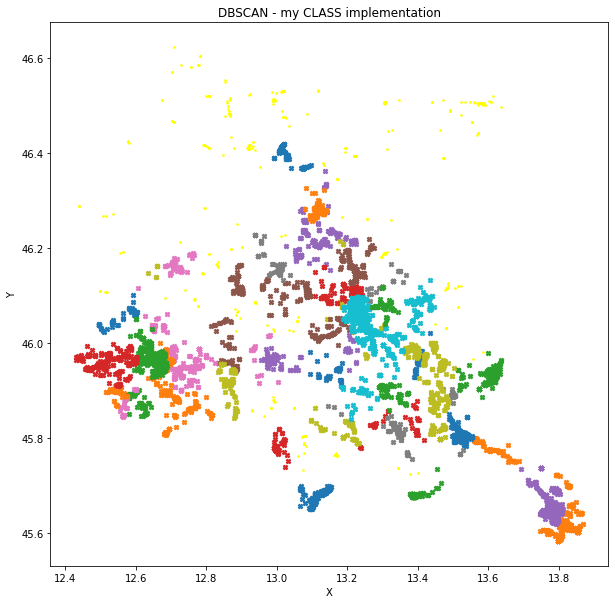

In [19]:
clusters = clustering_density_peaks_halo (X, epsilon=epsilon, minPoints=minPoints)
print((set(clusters)))

data['cluster']=clusters.astype(int)
data = data[ [ 'cf', 'company', 'lat', 'lon', 'cluster'] ]
data.to_csv('./data/FVG_comp_clusters.csv', index=False)

plt.figure(figsize=(10,10))

for clust in list(set(data.cluster)):
    x = np.array(data.lon[ data.cluster == clust ])
    y = np.array(data.lat[ data.cluster == clust ])
    if clust == 0: 
        plt.scatter(x, y, s=10, marker = ".", color = "yellow", label="halo")
    else:
        plt.scatter(x, y, s=20, marker = "X", label=f"Cluster{clust}")


#plt.legend([f"Cluster {clust}" for clust in np.unique(cluster)], loc ="lower right")
#plt.legend()
plt.title('DBSCAN - my CLASS implementation')
plt.xlabel('X')
plt.ylabel('Y')

21


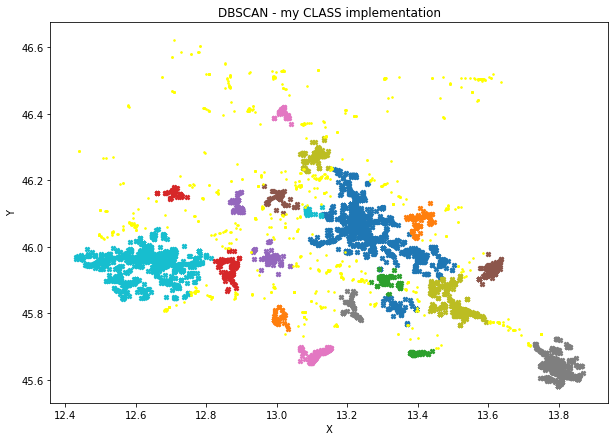

In [17]:
from sklearn.cluster import DBSCAN


clustering = DBSCAN(eps=epsilon, min_samples=minPoints).fit(X)
cc = clustering.labels_
plt.figure(figsize=(10,7))
for clust in list(set(cc)):
    x = np.array(data.lon[ clust == cc ])
    y = np.array(data.lat[ clust == cc ])
    if clust == -1: 
        plt.scatter(x, y, s=10, marker = ".", color = "yellow", label="halo")
    else:
        plt.scatter(x, y, s=20, marker = "X", label=f"Cluster{clust}")


#plt.legend([f"Cluster {clust}" for clust in np.unique(cluster)], loc ="lower right")
#plt.legend()
plt.title('DBSCAN - my CLASS implementation')
plt.xlabel('X')
plt.ylabel('Y')

print(len(set(cc)))